#Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Do not run this block. I used google drive. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

In [61]:
#Please add the path of data file in the path variable 
path = "/content/drive/MyDrive/Cresent Bank Hackathon/Final_Data.csv"
data = pd.read_csv(path)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13718 entries, 0 to 13717
Data columns (total 89 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   masked_acct                                          13718 non-null  object 
 1   FinalRecoveryRate                                    13718 non-null  float64
 2   Vintage                                              13718 non-null  int64  
 3   ChargeOffMonthKey                                    13718 non-null  int64  
 4   ChargeOffMOB                                         13718 non-null  int64  
 5   Loss_Date_150                                        13718 non-null  object 
 6   BalanceAtDefault                                     13718 non-null  float64
 7   JointIndicator                                       13718 non-null  int64  
 8   LCPIndicator                                         13718 non-nul

In [63]:
data.columns

Index(['masked_acct', 'FinalRecoveryRate', 'Vintage', 'ChargeOffMonthKey',
       'ChargeOffMOB', 'Loss_Date_150', 'BalanceAtDefault', 'JointIndicator',
       'LCPIndicator', 'FICOScore', 'StateApplicant',
       'FICOScorePctAvgFICOLast30DaysBookedLoans', 'ApplicationWeekday',
       'NewUsedIndicator', 'VehicleManufacturerRebate', 'VehicleAge',
       'VehicleMileage', 'VehicleValueBlackBook', 'TradeInIndicator',
       'TradeInAmt', 'VehicleMakeNADA', 'VehicleModelNADA',
       'JDPowerUsedVehicleIndex', 'MoodysNumUnemployed',
       'MoodysUsedVehicleIndex', 'MoodysNumEmployed', 'MoodysGDPReal',
       'MoodysGasoline', 'MoodysNumLaborForce', 'MoodysUnemploymentRate',
       'TradeInPctBBVehicleValue', 'TradeInPctLine3', 'TradeInPctLine4',
       'TradeInPctLine5', 'FinancedAmt', 'LoanAmtLine3', 'LoanAmtLine4',
       'LTVLine3', 'LTVLine4', 'LTVLine5', 'LTVLine3ExclRebate',
       'LTVLine4ExclRebate', 'LTVLine5ExclRebate', 'CashDownPmt',
       'CashDownPmtPctBBVehicleValue', 'C

In [64]:
#Some variables where very similar. So we did correlation check and kept any one. 
data['JDPowerUsedVehicleIndex'].corr(data['MoodysUsedVehicleIndex'])

0.8945554147969546

##Correlation Check and imputation

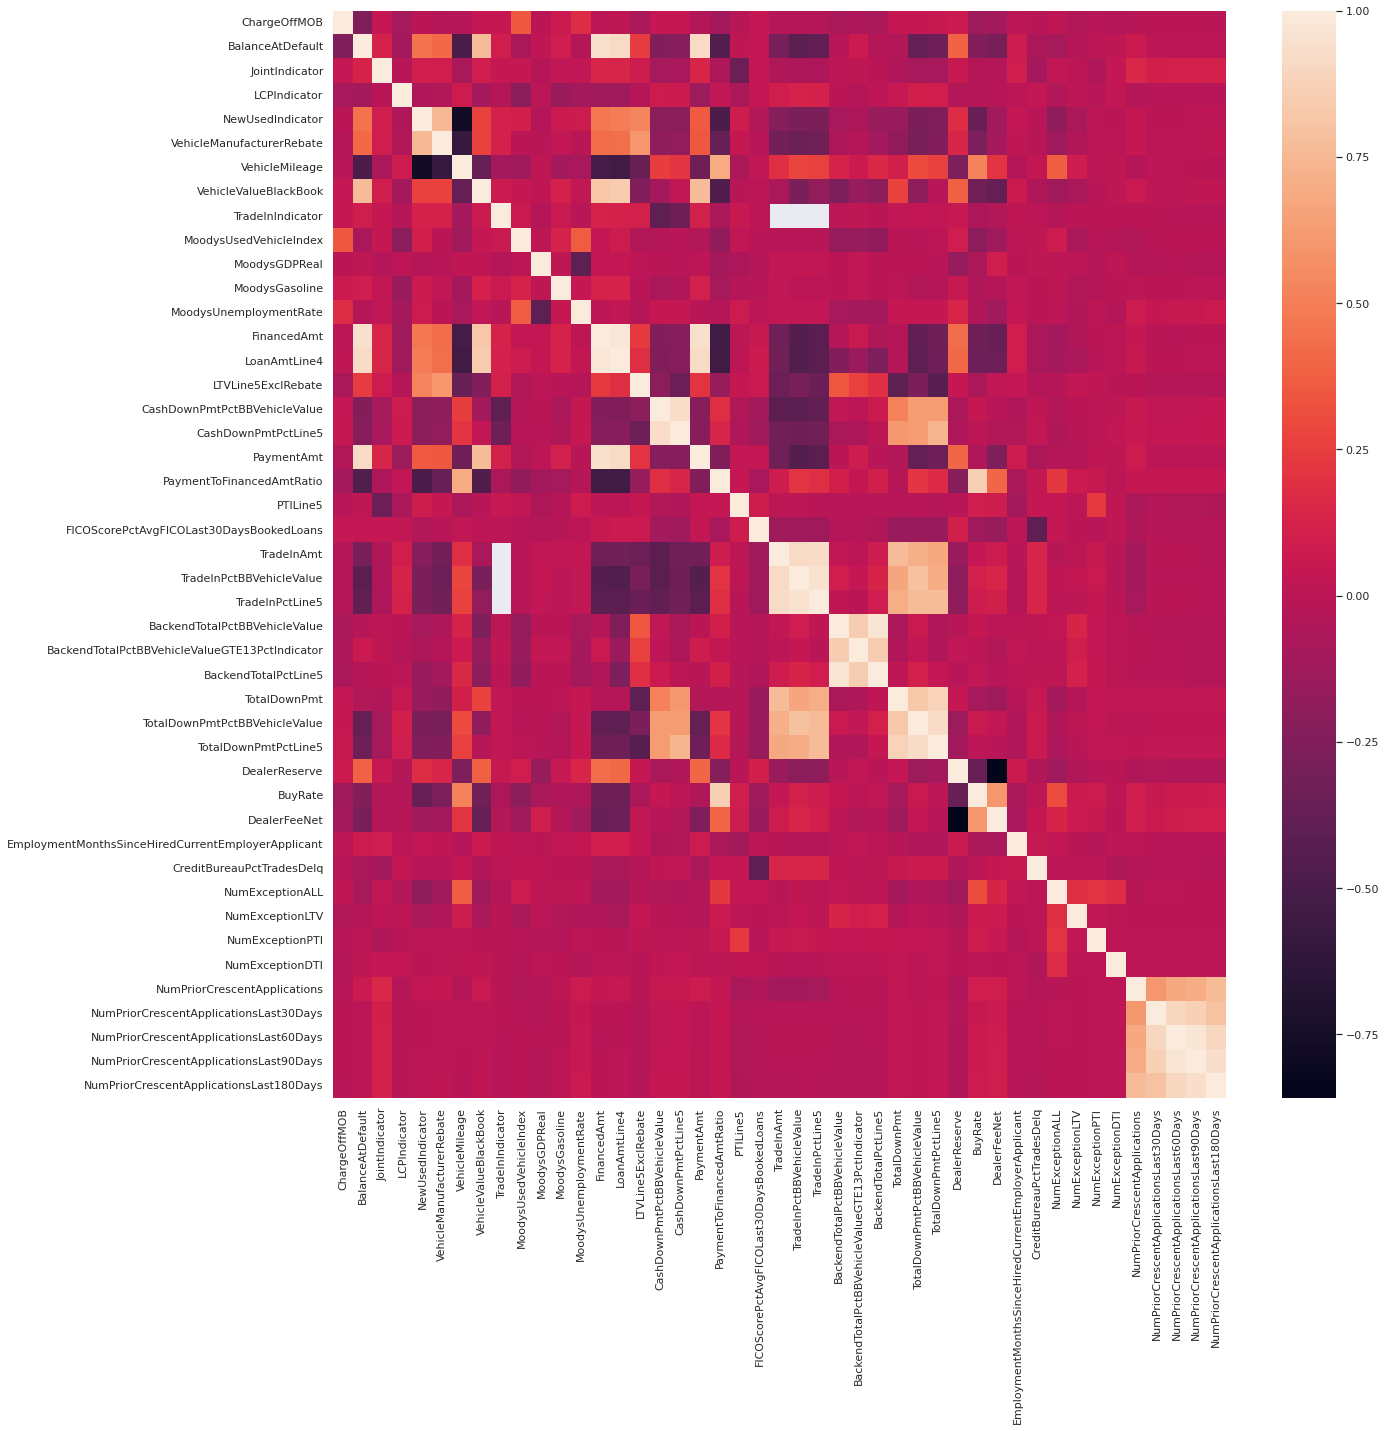

In [65]:
sns.set(rc = {'figure.figsize':(20,20)})
ax = sns.heatmap(data[['ChargeOffMOB', 'BalanceAtDefault', 'JointIndicator',
       'LCPIndicator',  'NewUsedIndicator', 'VehicleManufacturerRebate', 
       'VehicleMileage', 'VehicleValueBlackBook', 'TradeInIndicator',
       'MoodysUsedVehicleIndex', 'MoodysGDPReal',
       'MoodysGasoline',  'MoodysUnemploymentRate', 'FinancedAmt',  'LoanAmtLine4','LTVLine5ExclRebate', 
       'CashDownPmtPctBBVehicleValue', 'CashDownPmtPctLine5', 'PaymentAmt',
       'PaymentToFinancedAmtRatio', 'PTILine5','FICOScorePctAvgFICOLast30DaysBookedLoans',  'TradeInAmt', 'TradeInPctBBVehicleValue', 'TradeInPctLine5','BackendTotalPctBBVehicleValue',
       'BackendTotalPctBBVehicleValueGTE13PctIndicator',
       'BackendTotalPctLine5',
       'TotalDownPmt', 'TotalDownPmtPctBBVehicleValue', 'TotalDownPmtPctLine5', 'DealerReserve',
       'BuyRate', 'DealerFeeNet',
       'EmploymentMonthsSinceHiredCurrentEmployerApplicant', 'CreditBureauPctTradesDelq',
       'NumExceptionALL', 'NumExceptionLTV', 'NumExceptionPTI',
       'NumExceptionDTI','NumPriorCrescentApplications',
       'NumPriorCrescentApplicationsLast30Days',
       'NumPriorCrescentApplicationsLast60Days',
       'NumPriorCrescentApplicationsLast90Days',
       'NumPriorCrescentApplicationsLast180Days']].corr())
#plt.figure(figsize=(16, 10))

In [66]:
dataz = data[['FinalRecoveryRate','ChargeOffMOB', 'BalanceAtDefault', 'JointIndicator',
       'LCPIndicator', 'FICOScore', 'StateApplicant',
       'FICOScorePctAvgFICOLast30DaysBookedLoans', 'ApplicationWeekday',
       'NewUsedIndicator', 'VehicleManufacturerRebate', 'VehicleAge',
       'VehicleMileage', 'VehicleValueBlackBook', 'TradeInIndicator',
       'TradeInAmt', 'VehicleMakeNADA',
       'MoodysUsedVehicleIndex', 'MoodysGDPReal',
       'MoodysGasoline', 'MoodysNumLaborForce', 'MoodysUnemploymentRate',
       'TradeInPctBBVehicleValue',
       'TradeInPctLine5', 'FinancedAmt',  'LoanAmtLine4','LTVLine5ExclRebate', 
       'CashDownPmtPctBBVehicleValue', 'CashDownPmtPctLine5', 'PaymentAmt',
       'PaymentToFinancedAmtRatio', 'PTILine5',  'BackendTotalAmt', 
       'BackendTotalPctBBVehicleValue',
       'BackendTotalPctBBVehicleValueGTE13PctIndicator',
       'BackendTotalPctLine5',
       'TotalDownPmt', 'TotalDownPmtPctBBVehicleValue', 'TotalDownPmtPctLine5', 'DealerReserve','ContractRate',
       'BuyRate', 'DealerFeeNet',
       'EmploymentMonthsSinceHiredCurrentEmployerApplicant',
       'EmploymentJobTypeApplicant', 'CreditBureauPctTradesDelq',
       'NumExceptionALL', 'NumExceptionLTV', 'NumExceptionPTI',
       'NumExceptionDTI',
       'NumExceptionPctAvgNumExceptionLast30DaysBookedLoans',
       'NumPriorCrescentApplications',
       'MoodysUVIDiffCOFromOrig']]

In [67]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13718 entries, 0 to 13717
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   FinalRecoveryRate                                    13718 non-null  float64
 1   ChargeOffMOB                                         13718 non-null  int64  
 2   BalanceAtDefault                                     13718 non-null  float64
 3   JointIndicator                                       13718 non-null  int64  
 4   LCPIndicator                                         13718 non-null  int64  
 5   FICOScore                                            9504 non-null   float64
 6   StateApplicant                                       13714 non-null  object 
 7   FICOScorePctAvgFICOLast30DaysBookedLoans             9504 non-null   float64
 8   ApplicationWeekday                                   13718 non-nul

In [68]:
#FICO SCORE PREPROCERSSING with binary variable creation. Fico zero if null. 
dataz['FICOScore'] =dataz['FICOScore'].fillna(0)
f1 = lambda x: 1 if (x!= 0) else 0
ficoBinary = dataz['FICOScore'].apply(f1)
ficoBinary.head(10)
ficoBinary = ficoBinary.astype('category')
dataz['FicoBinary'] = ficoBinary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [69]:
#TradeIn Amount zero if null. FicoPercentangeChange zero if null. 
dataz['TradeInAmt'] =dataz['TradeInAmt'].fillna(0)
dataz['FICOScorePctAvgFICOLast30DaysBookedLoans'] = dataz['FICOScorePctAvgFICOLast30DaysBookedLoans'].fillna(0)
dataz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13718 entries, 0 to 13717
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   FinalRecoveryRate                                    13718 non-null  float64 
 1   ChargeOffMOB                                         13718 non-null  int64   
 2   BalanceAtDefault                                     13718 non-null  float64 
 3   JointIndicator                                       13718 non-null  int64   
 4   LCPIndicator                                         13718 non-null  int64   
 5   FICOScore                                            13718 non-null  float64 
 6   StateApplicant                                       13714 non-null  object  
 7   FICOScorePctAvgFICOLast30DaysBookedLoans             13718 non-null  float64 
 8   ApplicationWeekday                                   137

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
# We removed the rows which had missing values in StateApplicant and VehicleBlackbookValue 
dataz = dataz.dropna(subset=['StateApplicant', 'VehicleValueBlackBook','NumExceptionPctAvgNumExceptionLast30DaysBookedLoans','CreditBureauPctTradesDelq' ])
dataz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13489 entries, 0 to 13717
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   FinalRecoveryRate                                    13489 non-null  float64 
 1   ChargeOffMOB                                         13489 non-null  int64   
 2   BalanceAtDefault                                     13489 non-null  float64 
 3   JointIndicator                                       13489 non-null  int64   
 4   LCPIndicator                                         13489 non-null  int64   
 5   FICOScore                                            13489 non-null  float64 
 6   StateApplicant                                       13489 non-null  object  
 7   FICOScorePctAvgFICOLast30DaysBookedLoans             13489 non-null  float64 
 8   ApplicationWeekday                                   134

In [71]:
# For the Vehicle if the category is not know we will consider it as a NONE category. 
#For the TradeInPctBBVehicleValue and TradeInPctLine5, we will put zero for the null values. 
# We have also removed the rows will null values for CreditBureauPctTradesDelq
dataz['VehicleMakeNADA']= dataz['VehicleMakeNADA'].fillna('NONE')
dataz['TradeInPctBBVehicleValue']=dataz['TradeInPctBBVehicleValue'].fillna(0)
dataz['TradeInPctLine5']=dataz['TradeInPctLine5'].fillna(0)
# Till now the missing values are removed. we have no row will null values. 

In [72]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13489 entries, 0 to 13717
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   FinalRecoveryRate                                    13489 non-null  float64 
 1   ChargeOffMOB                                         13489 non-null  int64   
 2   BalanceAtDefault                                     13489 non-null  float64 
 3   JointIndicator                                       13489 non-null  int64   
 4   LCPIndicator                                         13489 non-null  int64   
 5   FICOScore                                            13489 non-null  float64 
 6   StateApplicant                                       13489 non-null  object  
 7   FICOScorePctAvgFICOLast30DaysBookedLoans             13489 non-null  float64 
 8   ApplicationWeekday                                   134

##Creating Dummies for Categorical Variables 

In [73]:
list1 = [ 'JointIndicator','LCPIndicator','NewUsedIndicator', 'TradeInIndicator', 'VehicleMakeNADA',
       'BackendTotalPctBBVehicleValueGTE13PctIndicator', 'StateApplicant', 'ApplicationWeekday','EmploymentJobTypeApplicant']
for col in list1:
    dataz[col] = dataz[col].astype('category')
# StateApplicant, Weekday, Vehicle Make NADA, EmploymentJobTypeApplicant, 

In [74]:
# Creating a binary Variable if there is difference in the contract rate and Buy Rate
# If there is difference in the rat the binary variable will take value 1, else 0 
a = (dataz['ContractRate']- dataz['BuyRate'])
f1 =  lambda x: 0  if x==0 else 1
a = a.apply(f1)
a = a.astype('category')
dataz['Diff_Rate'] = a 

In [75]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13489 entries, 0 to 13717
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   FinalRecoveryRate                                    13489 non-null  float64 
 1   ChargeOffMOB                                         13489 non-null  int64   
 2   BalanceAtDefault                                     13489 non-null  float64 
 3   JointIndicator                                       13489 non-null  category
 4   LCPIndicator                                         13489 non-null  category
 5   FICOScore                                            13489 non-null  float64 
 6   StateApplicant                                       13489 non-null  category
 7   FICOScorePctAvgFICOLast30DaysBookedLoans             13489 non-null  float64 
 8   ApplicationWeekday                                   134

###ANOVA Test for NON BINARY CATEGORICAL Variables 

####ANOVA Test for the state Variable 

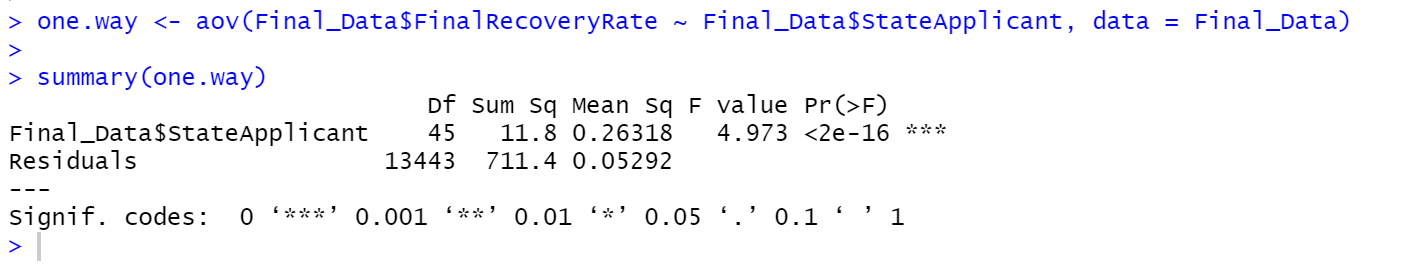

####ANOVA Test for Vehicle Make Variable 

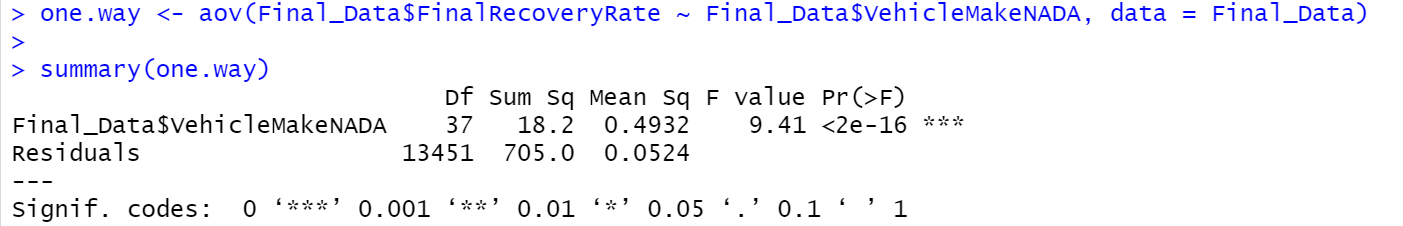

####ANOVA Test for Employment Job Type 

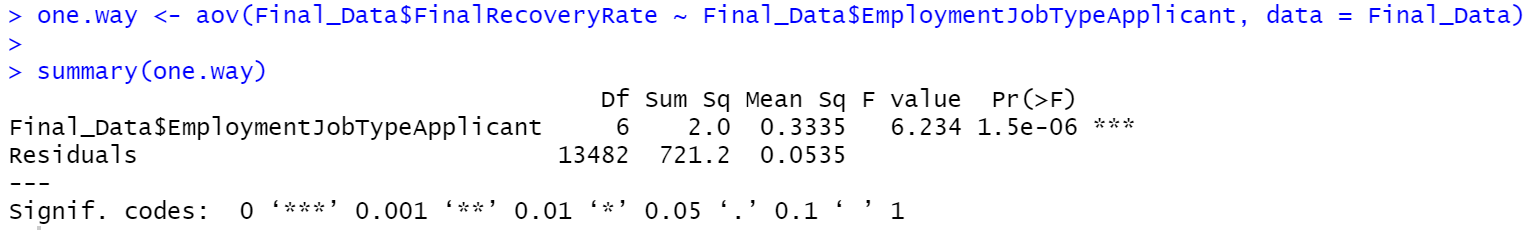

####ANOVA Test for Application WeekDay  



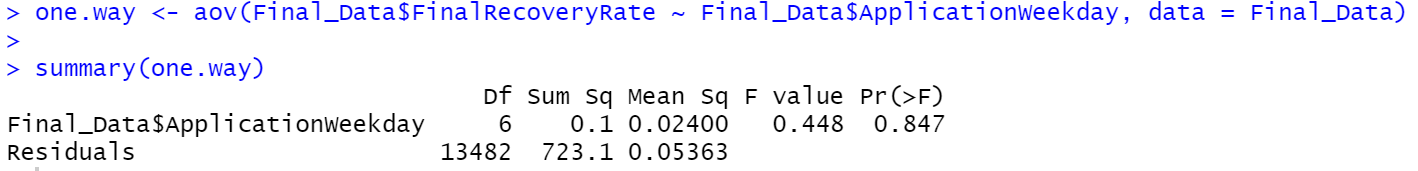

###Conclusion of ANOVA Tests

Conclusion: From the Anova Test we can see that there is difference in the recovery rate for different categories. 

Variables that need to be considered based on the P value of the tests: 
1) StateApplicant 
2) EmploymentJobType
3) VehicleMakeNADA

Rejected Variable: 
1) WeekDay 

###Dummies Creation 

In [76]:
dummies0 = pd.get_dummies(dataz['EmploymentJobTypeApplicant'])
print(dummies0.columns)
dummies0 = dummies0.drop(columns=['UNEMPLOYED'])
dummies0.head()
# To avoid Dummy variable Trap - We Will Drop UNEmployed variables

CategoricalIndex(['EMPLOYED', 'MILITARY', 'MISSING', 'OTHER', 'RETIRED',
                  'SELF-EMPLOYED', 'UNEMPLOYED'],
                 categories=['EMPLOYED', 'MILITARY', 'MISSING', 'OTHER', 'RETIRED', 'SELF-EMPLOYED', 'UNEMPLOYED'], ordered=False, dtype='category')


EMPLOYED  MILITARY  MISSING  OTHER  RETIRED  SELF-EMPLOYED
0         1         0        0      0        0              0
1         1         0        0      0        0              0
2         1         0        0      0        0              0
3         1         0        0      0        0              0
4         0         0        0      1        0              0

In [77]:
dummies1 = pd.get_dummies(dataz['StateApplicant'])
print(dummies1.columns)
dummies1 = dummies1.drop(columns=['TX'])
dummies1.head()
## To avoid Dummy variable Trap - We Will Drop TX State- LONE STAR STATE :) 

CategoricalIndex(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                  'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                  'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NJ', 'NM', 'NV', 'NY',
                  'OH', 'OK', 'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX', 'UT',
                  'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
                 categories=['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', ...], ordered=False, dtype='category')


AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  ...  SC  SD  TN  UT  VA  VT  WA  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   WI  WV  WY  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 45 columns]

In [78]:
dummies2 = pd.get_dummies(dataz['VehicleMakeNADA'])
print(dummies2.columns)
dummies2 = dummies2.drop(columns=['NONE'])
dummies2.head()
# To avoid Dummy variable Trap - We Will Drop None 

CategoricalIndex(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
                  'CHEVROLET TRUCK', 'CHRYSLER', 'DODGE', 'DODGE TRUCK',
                  'FIAT', 'FORD', 'FORD TRUCK', 'GMC LIGHT DUTY', 'HONDA',
                  'HUMMER', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
                  'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ', 'MERCURY',
                  'MINI', 'MITSUBISHI', 'NISSAN', 'NONE', 'PONTIAC', 'SATURN',
                  'SCION', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN',
                  'VOLVO'],
                 categories=['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHEVROLET TRUCK', 'CHRYSLER', ...], ordered=False, dtype='category')


ACURA  AUDI  BMW  BUICK  CADILLAC  CHEVROLET  CHEVROLET TRUCK  CHRYSLER  \
0      0     0    0      0         0          0                0         0   
1      0     0    0      0         0          0                0         0   
2      0     0    0      0         0          0                0         0   
3      0     0    0      0         0          0                0         0   
4      0     0    0      0         0          0                0         0   

   DODGE  DODGE TRUCK  ...  MITSUBISHI  NISSAN  PONTIAC  SATURN  SCION  \
0      0            0  ...           0       0        0       0      0   
1      0            0  ...           0       0        0       0      0   
2      0            0  ...           0       1        0       0      0   
3      0            0  ...           0       0        0       0      0   
4      0            0  ...           0       0        0       0      0   

   SUBARU  SUZUKI  TOYOTA  VOLKSWAGEN  VOLVO  
0       0       0       0           0      0  
1       0       0       0           0      0  
2       0       0       0           0      0  
3       0       0       0           0      0  
4       0       0       0           0      0  

[5 rows x 37 columns]

In [79]:
dataz = pd.concat([dataz, dummies0 ,  dummies1, dummies2 ], axis=1)

In [81]:
dataz = dataz.drop(columns=['StateApplicant', 'ApplicationWeekday' , 'VehicleMakeNADA' , 'EmploymentJobTypeApplicant'])

In [82]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13489 entries, 0 to 13717
Columns: 139 entries, FinalRecoveryRate to VOLVO
dtypes: category(7), float64(35), int64(9), uint8(88)
memory usage: 6.4 MB


In [83]:
dataz.columns

Index(['FinalRecoveryRate', 'ChargeOffMOB', 'BalanceAtDefault',
       'JointIndicator', 'LCPIndicator', 'FICOScore',
       'FICOScorePctAvgFICOLast30DaysBookedLoans', 'NewUsedIndicator',
       'VehicleManufacturerRebate', 'VehicleAge',
       ...
       'MITSUBISHI', 'NISSAN', 'PONTIAC', 'SATURN', 'SCION', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype='object', length=139)

#Preparing the Training Set and Test Set 

In [252]:
from sklearn.model_selection import train_test_split
X = dataz.iloc[:,1:]
Y = dataz['FinalRecoveryRate']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Model Building

###Linear Regression 

In [253]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

model.fit(X_train,y_train)
print("R-Squared :",model.score(X_train,y_train))

R-Squared : 0.23282866169134286


In [254]:
#Used Cross Validation to make sure our results 
cv = RepeatedKFold(n_splits=5,random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [255]:
np.mean(scores)

-0.04322878131256614

In [333]:
print("Test Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test,model.predict(X_test))))
print("Train Root Mean Squared Error :", np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print("Overall Root Mean Squared Error: " ,np.sqrt(mean_squared_error(dataz['FinalRecoveryRate'],model.predict(dataz.iloc[:,1:]))) )

Test Root Mean Squared Error : 0.20735305713180655
Train Root Mean Squared Error : 0.2029617823062699
Overall Root Mean Squared Error:  0.2038476706688369


In [308]:
import pickle
Linear_Regression_Model = '/content/sample_data/LinearRegression'
pickle.dump(model,open(Linear_Regression_Model,'wb'))

In [309]:
loaded_model = pickle.load(open(Linear_Regression_Model,'rb'))
loaded_model.predict(X_test)

array([0.25855258, 0.54640162, 0.41193235, ..., 0.52533287, 0.48487713,
       0.41995481])

###Ridge Regreesion 

In [304]:
from sklearn.linear_model import Ridge
import numpy as np


model1 = Ridge(alpha=1)
model1.fit(X_train, y_train)
print(model1.score(X_train,y_train))

0.23001859288742388


In [332]:
print("Test Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test,model1.predict(X_test))))
print("Train Root Mean Squared Error :", np.sqrt(mean_squared_error(y_train,model1.predict(X_train))))
print("Overall Root Mean Squared Error: " ,np.sqrt(mean_squared_error(dataz['FinalRecoveryRate'],model1.predict(dataz.iloc[:,1:]))) )

Test Root Mean Squared Error : 0.20640681725130433
Train Root Mean Squared Error : 0.20333315648817496
Overall Root Mean Squared Error:  0.20395164019084552


In [310]:
import pickle
Ridge_Regression_Model = '/content/sample_data/RidgeRegression'
pickle.dump(model1,open(Ridge_Regression_Model,'wb'))

In [311]:
loaded_model = pickle.load(open(Ridge_Regression_Model,'rb'))
loaded_model.predict(X_test)

array([0.27396773, 0.55668008, 0.40500443, ..., 0.48178884, 0.48860204,
       0.43344224])

###LASSO Regression

In [314]:
from sklearn import linear_model
model2 = linear_model.Lasso(alpha=0.001)

model2.fit(X_train, y_train)
print(model2.score(X_train,y_train))

0.20755169303918164


In [334]:
print("Test Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test,model2.predict(X_test))))
print("Train Root Mean Squared Error :", np.sqrt(mean_squared_error(y_train,model2.predict(X_train))))
print("Overall Root Mean Squared Error: " ,np.sqrt(mean_squared_error(dataz['FinalRecoveryRate'],model2.predict(dataz.iloc[:,1:]))) )

Test Root Mean Squared Error : 0.20579208559073192
Train Root Mean Squared Error : 0.2062783051111399
Overall Root Mean Squared Error:  0.2061811457318752


In [316]:
import pickle
Lasso_Regression_Model = '/content/sample_data/LassoRegression'
pickle.dump(model2,open(Lasso_Regression_Model,'wb'))

In [317]:
loaded_model = pickle.load(open(Lasso_Regression_Model,'rb'))
loaded_model.predict(X_test)

array([0.32126096, 0.50318913, 0.40348009, ..., 0.35806282, 0.48884893,
       0.4236029 ])

###Decision Tree Regressor 

In [318]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
cv = RepeatedKFold(n_splits=10,random_state=1)
scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [319]:
np.mean(scores)

-0.0881838126125726

In [335]:
print("Test Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test,regressor.predict(X_test))))
print("Train Root Mean Squared Error :", np.sqrt(mean_squared_error(y_train,regressor.predict(X_train))))
print("Overall Root Mean Squared Error: " ,np.sqrt(mean_squared_error(dataz['FinalRecoveryRate'],regressor.predict(dataz.iloc[:,1:]))) )

Test Root Mean Squared Error : 0.30042747504398576
Train Root Mean Squared Error : 0.0
Overall Root Mean Squared Error:  0.1343602313874391


In [321]:
import pickle
Desicion_Tree_Regression_Model = '/content/sample_data/DescisionTreeRegression'
pickle.dump(regressor,open(Desicion_Tree_Regression_Model,'wb'))

In [322]:
loaded_model = pickle.load(open(Desicion_Tree_Regression_Model,'rb'))
loaded_model.predict(X_test)

array([0.0674, 0.6105, 0.5018, ..., 0.6626, 0.478 , 0.3552])

###Random Forest Regressor 

In [171]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators= 20 , max_depth= 30,max_samples=1100, random_state=0)

regr.fit(X_train,y_train)
print(regr.score(X_train,y_train))
predicted = regr.predict(X_test)
mean_squared_error(y_test,predicted)

0.3107376871180303


0.04527265204587122

In [336]:
print("Test Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print("Train Root Mean Squared Error :", np.sqrt(mean_squared_error(y_train,regr.predict(X_train))))
print("Overall Root Mean Squared Error: " ,np.sqrt(mean_squared_error(dataz['FinalRecoveryRate'],regr.predict(dataz.iloc[:,1:]))) )

Test Root Mean Squared Error : 0.19765967342079635
Train Root Mean Squared Error : 0.1989314298691934
Overall Root Mean Squared Error:  0.1986777110120892


In [323]:
import pickle
Random_Forest_Regression_Model = '/content/sample_data/RandomForestRegression'
pickle.dump(regr,open(Random_Forest_Regression_Model,'wb'))

In [326]:
loaded_model = pickle.load(open(Random_Forest_Regression_Model,'rb'))
loaded_model.predict(X_test)

array([0.3147  , 0.53086 , 0.37609 , ..., 0.34837 , 0.546005, 0.44581 ])

###K Nearest Neighbour

In [327]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [337]:
print("Test Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test,neigh.predict(X_test))))
print("Train Root Mean Squared Error :", np.sqrt(mean_squared_error(y_train,neigh.predict(X_train))))
print("Overall Root Mean Squared Error: " ,np.sqrt(mean_squared_error(dataz['FinalRecoveryRate'],neigh.predict(dataz.iloc[:,1:]))) )

Test Root Mean Squared Error : 0.22748781245584557
Train Root Mean Squared Error : 0.21308122772606317
Overall Root Mean Squared Error:  0.2160396323786605


In [329]:
import pickle
KNN_Regression_Model = '/content/sample_data/KNN_Regression'
pickle.dump(neigh,open(KNN_Regression_Model,'wb'))

In [330]:
loaded_model = pickle.load(open(KNN_Regression_Model,'rb'))
loaded_model.predict(X_test)

array([0.3516    , 0.38412   , 0.44883333, ..., 0.32318   , 0.44068   ,
       0.50174   ])

#Combined Predicted Values 

In [349]:
Linear_regression= pd.Series( model.predict(dataz.iloc[:,1:]),name='Linear_regression')
Ridge_regression =  pd.Series(model1.predict(dataz.iloc[:,1:]),name='Ridge_regression')
Lasso_regression =  pd.Series(model2.predict(dataz.iloc[:,1:]),name='Lasso_regression')
Descision_Tree_regression =  pd.Series(regressor.predict(dataz.iloc[:,1:]),name='Descision_tree_regression')
Random_Forest_regression =  pd.Series(regr.predict(dataz.iloc[:,1:]),name='Random_Forest_regression')
KNN_Regressor=  pd.Series(neigh.predict(dataz.iloc[:,1:]),name='KNN_regression')

In [359]:
RecoveryRate_Actual = dataz['FinalRecoveryRate']

In [363]:
RecoveryRate_Actual = RecoveryRate_Actual.rename('Actual_recovery_Rate')

In [364]:
a = pd.concat([RecoveryRate_Actual, Linear_regression , Ridge_regression, Lasso_regression,Descision_Tree_regression, Random_Forest_regression,KNN_Regressor], axis=1)

In [365]:
a.head()

Actual_recovery_Rate  Linear_regression  Ridge_regression  \
0                0.1856           0.415475          0.436679   
1                0.5442           0.513542          0.487042   
2                0.0000           0.376730          0.389897   
3                0.3586           0.451417          0.443023   
4                0.5889           0.569148          0.558033   

   Lasso_regression  Descision_tree_regression  Random_Forest_regression  \
0          0.484343                     0.1856                  0.334850   
1          0.546937                     0.5442                  0.499655   
2          0.416092                     0.0000                  0.350045   
3          0.501934                     0.3586                  0.447905   
4          0.526752                     0.7563                  0.649065   

   KNN_regression  
0        0.398940  
1        0.506213  
2        0.391667  
3        0.411360  
4        0.464287

In [370]:
a.to_csv('/content/sample_data/PredictedResults Pro Analysts.csv' , index= False)